In [5]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

print("First 5 rows")
print(df.head())

First 5 rows
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
print('Dataset overview')
print(df.shape)
print(df.info())

Dataset overview
(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [7]:
print('Missing values')
print(df.isnull().sum())

Missing values
review       0
sentiment    0
dtype: int64


In [8]:
print('Target variable distribution')
print(df['sentiment'].value_counts())

Target variable distribution
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


The Dataset has 2 columns- Review and Sentiment and has 50k rows

No missing values

And the dataset is balanced

-EDA and Preprocessing-

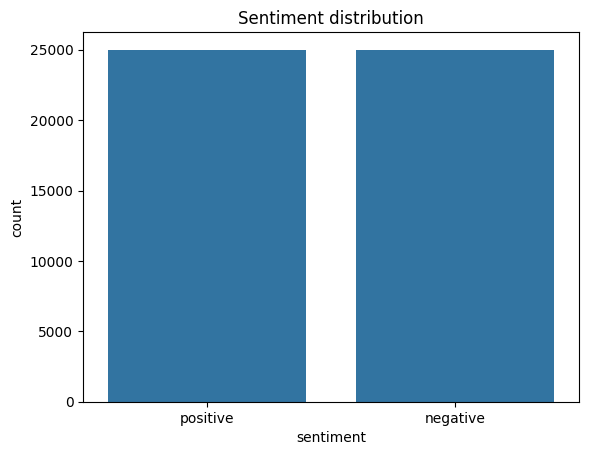

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment distribution')
plt.show()

In [11]:
df['review_length'] = df['review'].apply(len)
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [12]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,review_length,word count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


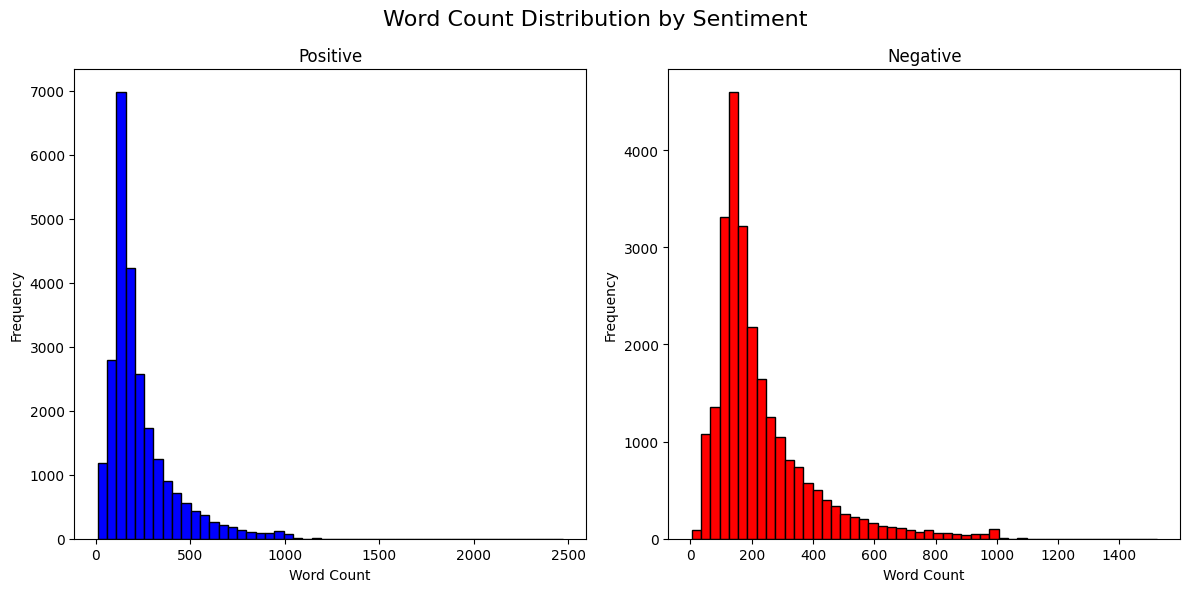

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df[df['sentiment'] == 'positive']['word count'], bins=50, color='blue', edgecolor='black')
ax[0].set_title('Positive')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

ax[1].hist(df[df['sentiment'] == 'negative']['word count'], bins=50, color='red', edgecolor='black')
ax[1].set_title('Negative')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

fig.suptitle('Word Count Distribution by Sentiment', fontsize=16)
plt.tight_layout()
plt.show()

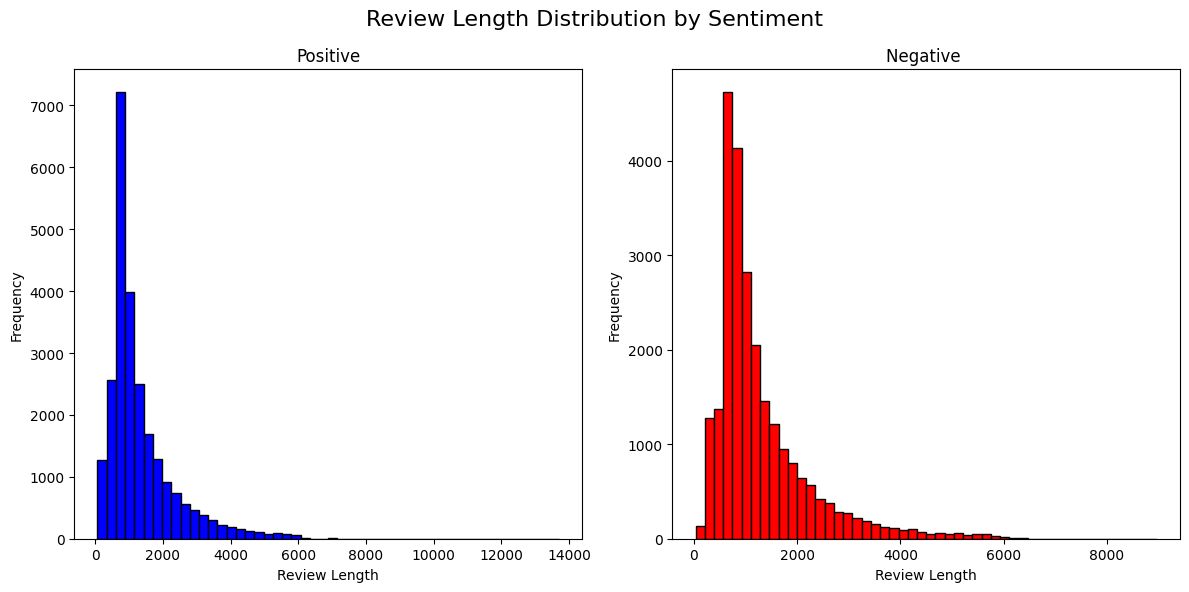

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(df[df['sentiment'] == 'positive']['review_length'], bins=50, color='blue', edgecolor='black')
ax[0].set_title('Positive')
ax[0].set_xlabel('Review Length')
ax[0].set_ylabel('Frequency')

ax[1].hist(df[df['sentiment'] == 'negative']['review_length'], bins=50, color='red', edgecolor='black')
ax[1].set_title('Negative ')
ax[1].set_xlabel('Review Length')
ax[1].set_ylabel('Frequency')

fig.suptitle('Review Length Distribution by Sentiment', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nilaknainduwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nilaknainduwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nilaknainduwari/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nilaknainduwari/nltk_data...


In [19]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-z\s]', '', text)

    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,review_length,word count,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1761,307,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,998,162,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,138,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,petter matteis love time money visually stunni...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_raw = df['cleaned_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 5000)
X_test shape: (10000, 5000)
y_train shape: (40000,)
y_test shape: (10000,)


Even distribution of positive and negative reviews can be confimed by plots

Positive reviews are generally longer than negative ones

Most reviews range between 500-1500 characters

Positive reviews contain more words

Most reviews range between 100–300 words

80/20 split using train_test_split- Training set- 40,000 reviews and Test set- 10,000 reviews

Mapped sentiment as positive=1 and negative=0

-Model Development and Training-

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

Logistic Regression Performance:
Accuracy:  0.8852
Precision: 0.8768
Recall:    0.8984
F1 Score:  0.8875


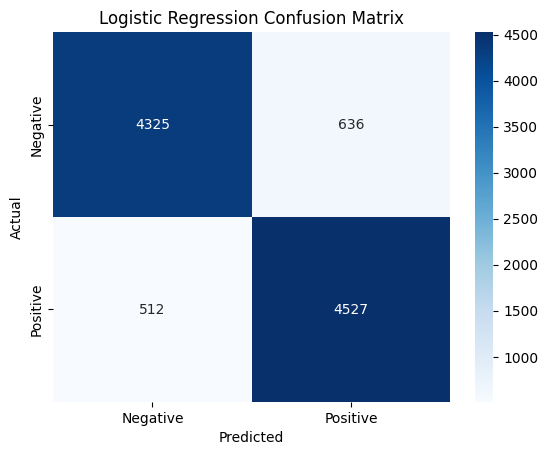

In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_results = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

Naive Bayes Performance:
Accuracy:  0.8490
Precision: 0.8473
Recall:    0.8543
F1 Score:  0.8508


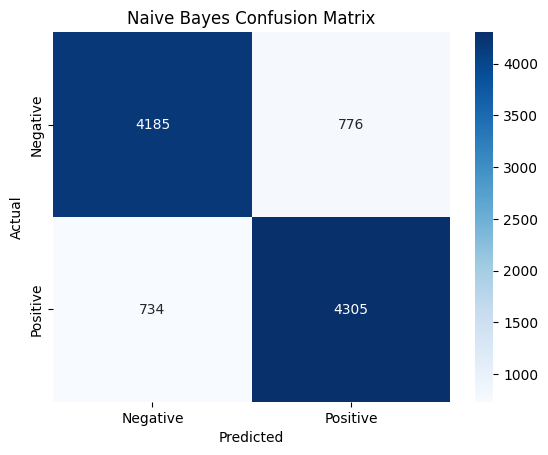

In [34]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_results = evaluate_model(nb_model, X_test, y_test, "Naive Bayes")

SVM Performance:
Accuracy:  0.8790
Precision: 0.8731
Recall:    0.8891
F1 Score:  0.8810


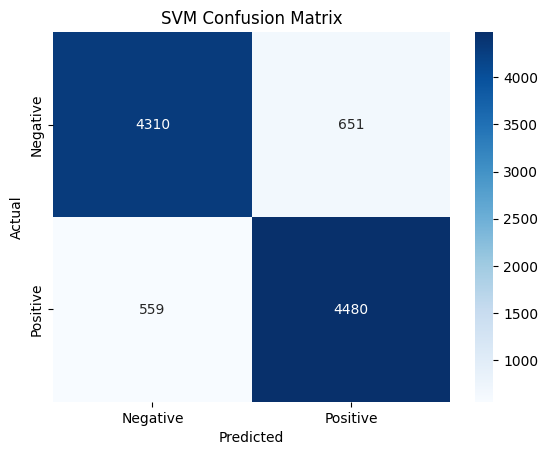

In [35]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_results = evaluate_model(svm_model, X_test, y_test, "SVM")

In [37]:
import pandas as pd

results_df = pd.DataFrame([lr_results, nb_results, svm_results])
results_df = results_df.sort_values(by="F1 Score", ascending=False)

print("Model Comparison Table:")
print(results_df)

Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.8852   0.876816  0.898393  0.887473
2                  SVM    0.8790   0.873124  0.889065  0.881023
1          Naive Bayes    0.8490   0.847274  0.854336  0.850791
